In [2]:
import pandas as pd

df = pd.read_csv("metro-bike-share-trip-data.csv")
station_delta = {}

sanitized_df = df.dropna(subset=["Starting Station ID", "Ending Station ID", "Start Time"])
for _, row in sanitized_df.iterrows():
    day = row["Start Time"].split("T")[0] # We only care about the day
    if row["Starting Station ID"] in station_delta:
        if day in station_delta[row["Starting Station ID"]]:
            station_delta[row["Starting Station ID"]][day] -= 1
        else:
            station_delta[row["Starting Station ID"]][day] = -1
    else:
        station_delta[row["Starting Station ID"]] = {}
        station_delta[row["Starting Station ID"]][day] = -1
    if row["Ending Station ID"] in station_delta:
        if day in station_delta[row["Ending Station ID"]]:
            station_delta[row["Ending Station ID"]][day] += 1
        else:
            station_delta[row["Ending Station ID"]][day] = 1
    else:
        station_delta[row["Ending Station ID"]] = {}
        station_delta[row["Ending Station ID"]][day] = 1


/Users/alechin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from statistics import mean, stdev

mean_delta, stdev_delta = {}, {}

for k,v in station_delta.items():
    mean_delta[k] = mean(station_delta[k].values())
    stdev_delta[k] = stdev(station_delta[k].values())

In [4]:
mean_delta.values()

dict_values([3.037313432835821, -0.1752988047808765, 1.1729323308270676, 4.37037037037037, -0.099601593625498, 1.6604477611940298, 0.2188679245283019, 5.19172932330827, 3.3171641791044775, 0.01968503937007874, -0.8838951310861424, 3.0559701492537314, 4.7835820895522385, -3.111940298507463, 0.7320754716981132, 0.4419475655430712, 0.27710843373493976, -2.955223880597015, 0.9659090909090909, -8.49812734082397, -0.026119402985074626, 1.0153256704980842, -2.805243445692884, -1.1304347826086956, -0.8371212121212122, 1.058139534883721, -0.2, 0.09561752988047809, 0.39925373134328357, -2.5803921568627453, -3.0223880597014925, 0.5283018867924528, -0.4552238805970149, -0.39552238805970147, 0.5655430711610487, -1.1791044776119404, -2.4813432835820897, -0.3895131086142322, 0.3438914027149321, 0.7096774193548387, -0.08783783783783784, 0.07575757575757576, 0.1095890410958904, 0.32452830188679244, -0.23595505617977527, 0.47, 0.028985507246376812, -1.8909774436090225, 1.9363295880149813, 0.074906367041

In [5]:
stdev_delta.values()

dict_values([5.176881360480752, 3.175082268281968, 4.141845870870271, 7.556819477462366, 2.4482728280641948, 4.607476722277016, 3.0694645054006138, 6.400831845854919, 5.573492992526166, 2.736737025122524, 3.6114899915251018, 5.002681096812885, 5.315318742822988, 5.342446027287016, 2.874902737808395, 3.893241776601458, 2.184881629325135, 3.8538189078378937, 3.065007447511518, 4.829712651857544, 3.589840619175563, 2.9101537742333554, 3.444442324852195, 2.6507678224071567, 2.800051745937665, 2.681633675787156, 1.6431676725154984, 2.818301033802364, 4.382583785793392, 2.5549873728707144, 3.927176832193525, 3.4783081788862575, 3.3589629031735, 4.574016595507311, 3.3016303766191926, 4.419654343202431, 3.474307365789215, 3.4343962470271885, 1.595254686696062, 1.4599566462374025, 1.2612975397298714, 2.2943846549367675, 1.90288272743613, 3.745750403253836, 5.36562955946467, 0.8698658900466593, 1.4411195872784064, 3.7152609019153164, 3.8466456449783664, 3.6841980553098366, 2.574182412794327, 1.9

In [18]:
for c, a, b in zip(mean_delta.keys(), mean_delta.values(), stdev_delta.values()):
    if abs(a) > b:
        print(c, a, b)

3068.0 -8.49812734082397 4.829712651857544
3028.0 -2.5803921568627453 2.5549873728707144
3024.0 -3.5019762845849804 3.2557939878774333
3000.0 5.082417582417582 2.7749508345291076


In [7]:
import matplotlib.pyplot as plt
plt.bar(range(len(mean_delta)), mean_delta.values(), yerr=stdev_delta.values())
plt.title("Average +/- Bikes by Station")
plt.ylabel("Bike Gain")
plt.xticks([])
plt.show()

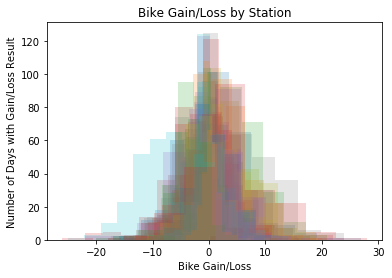

In [15]:
for k,v in station_delta.items():
    plt.hist(v.values(), alpha=0.2)
plt.title("Bike Gain/Loss by Station")
plt.xlabel("Bike Gain/Loss")
plt.ylabel("Number of Days with Gain/Loss Result")
plt.show()